# 1. EXPLORATORY DATA ANALYSIS

In [1]:
import json
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss


#check all the columns and the first rows of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

with open('logins.json', 'r') as json_file:
    json_data= json.load(json_file)

In [2]:
for key, value in json_data.items():
    print(key, ":", value)

login_time : ['1970-01-01 20:13:18', '1970-01-01 20:16:10', '1970-01-01 20:16:37', '1970-01-01 20:16:36', '1970-01-01 20:26:21', '1970-01-01 20:21:41', '1970-01-01 20:12:16', '1970-01-01 20:35:47', '1970-01-01 20:35:38', '1970-01-01 20:47:52', '1970-01-01 20:26:05', '1970-01-01 20:31:03', '1970-01-01 20:34:46', '1970-01-01 20:36:34', '1970-01-01 20:39:25', '1970-01-01 20:40:37', '1970-01-01 20:34:58', '1970-01-01 20:43:59', '1970-01-01 20:47:46', '1970-01-01 20:46:34', '1970-01-01 20:56:07', '1970-01-01 20:49:12', '1970-01-01 20:59:06', '1970-01-01 20:59:59', '1970-01-01 21:15:01', '1970-01-01 21:09:24', '1970-01-01 21:19:24', '1970-01-01 21:20:53', '1970-01-01 21:29:19', '1970-01-01 21:58:05', '1970-01-01 21:51:51', '1970-01-01 21:59:40', '1970-01-01 22:08:34', '1970-01-01 22:02:51', '1970-01-01 21:58:32', '1970-01-01 22:02:31', '1970-01-01 22:05:32', '1970-01-01 22:02:46', '1970-01-01 22:10:28', '1970-01-01 22:11:58', '1970-01-01 22:01:05', '1970-01-01 22:19:10', '1970-01-01 22:16:54

In [3]:
lst = []
for key, value in json_data.items():
    lst = value
df = pd.DataFrame(lst)

In [4]:
df.head(25)

,0
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [5]:
df.shape

(93142, 1)

In [6]:
df.rename(columns={0: "DateTime"}, inplace= True)

In [7]:
df.dtypes

DateTime    object
dtype: object

In [8]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [9]:
df.dtypes

DateTime    datetime64[ns]
dtype: object

In [10]:
#format = '%Y-%m-%d%H:%M:%S'
#df['Datetime'] = pd.to_datetime(df['date'] + df['time'].astype("string"), format=format)
#df = df.set_index('DateTime')



In [11]:
df.head()

,DateTime
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [12]:
df.set_index('DateTime', inplace= True )

In [13]:
df['Count']= 1

In [14]:
df1 = df.resample('15min').sum()

In [15]:
df1.head()

,Count
DateTime,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


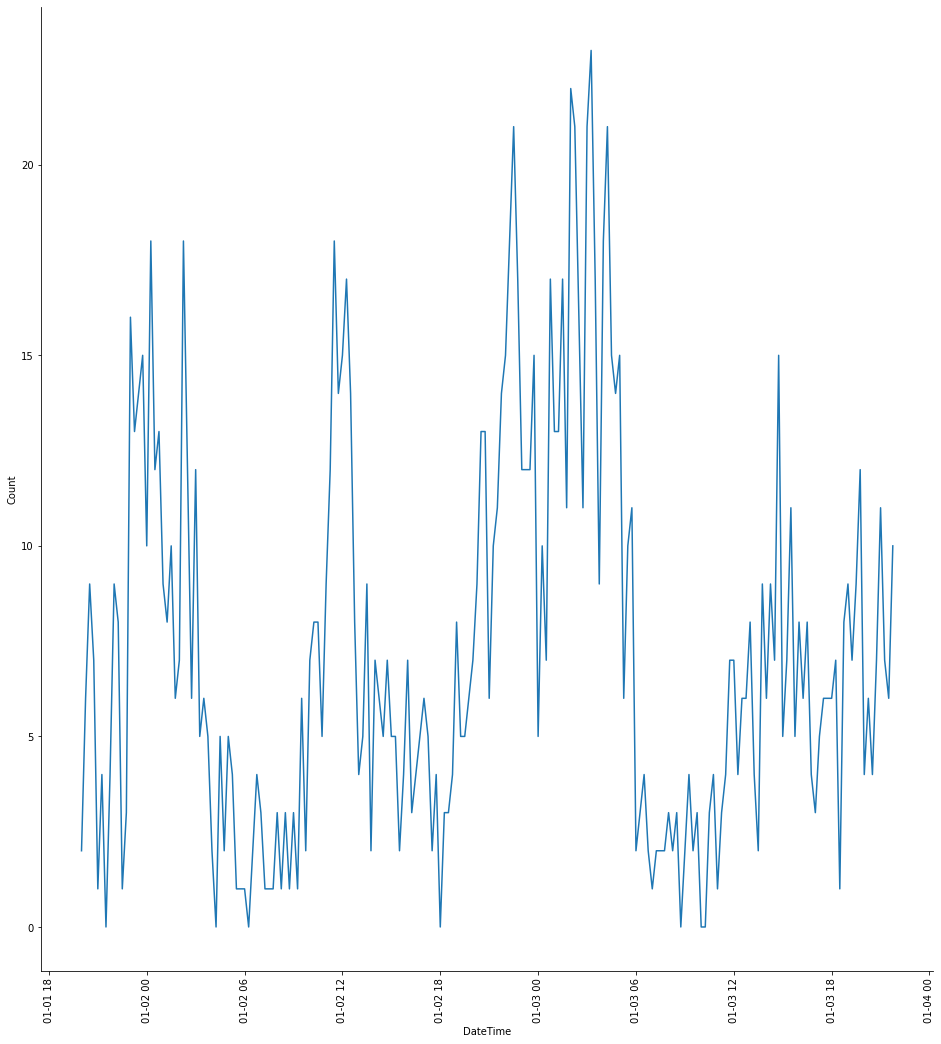

In [16]:

df2= df1[:200]
g=sns.relplot(x="DateTime", y="Count", data=df2, kind="line")
g.fig.set_size_inches(15,15)
plt.xticks(rotation=90)
plt.show()

### SEEMS LIKE THERE IS A 12 HOUR CYCLE WHERE AFTER EVERY 12 HOURS THE LOGIN COUNTS INCREASE
### MOST LOGINS OCCUR AT MID-AFTERNOON OR MIDNIGHT.

### THERE ARE NO MISSING VALUES IN DATA; HOWEVER THE DATA ARE NOT SERIALLY BOUND IN TIME

# PART 2: EXPERIMENTS AND METRIC DESIGN

#### 1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

#### The key metric needs to check what is the two-way traffic on the bridge. The driver needs to come back to home city  after one trip to the other city and needs a return passenger to offset the fuel cost. The two-way traffic needs to be independent of day-night since otherwise the driver will be idle waiting for returning passenger. 

#### 2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: a) how you will implement the experiment, b) what statistical test(s) you will conduct to verify the significance of the observation, c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

#### (a) Sample two-way traffic throughtout entire day on weekday and weekend, (b) Null hypothesis test where H0: Null hypothesis is equal two way traffic. If Null hypothesis is rejected because one way traffic is much higher than the other way; then propose to city operations team to offset fuel cost for drivers on trips which are going against commute direction.

# PART 3: PREDICTIVE MODELING

In [17]:
with open('ultimate_data_challenge.json', 'r') as json_ultimate:
    json_udata= json.load(json_ultimate)

In [18]:
df_ult = pd.DataFrame(json_udata)
df_ult.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [19]:
df_ult.shape

(50000, 12)

In [20]:
df_ult.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [21]:
df_ult.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [22]:
# Converting the dates from objects to datetime
df_ult['last_trip_date']= pd.to_datetime(df_ult['last_trip_date'])
df_ult['signup_date'] = pd.to_datetime(df_ult['signup_date'])

In [23]:
df_ult.head(100)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [24]:
#dropping all null values since ratings are important
df_ult.dropna(inplace= True)

In [25]:
df_ult.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [26]:
df_ult.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

# Below shows how to compare between columns and create a new column

In [27]:
#We define users who have repeated trips after 5 months and given good ratings as users most likely to 
# continue using the services. We create a new column 'active' which is our y label.

df_ult.loc[((df_ult['last_trip_date'] - df_ult['signup_date']).dt.days >= 150) 
       & (df_ult['avg_rating_of_driver'] > 4.0), 'active'] = 1

df_ult['active'] = df_ult['active'].fillna(0)

In [28]:
df_ult.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1.0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0.0
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,0.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,0.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,0.0
10,Winterfell,1,2014-01-13,5.0,1.00,2014-05-30,iPhone,0.0,True,100.0,4.28,4.9,0.0
11,Winterfell,3,2014-01-06,4.0,1.00,2014-01-10,iPhone,0.0,False,100.0,3.81,5.0,0.0


In [29]:
df_ult.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,2.609675,4.601720,1.073822,8.898709,61.254897,5.460046,4.776446,0.237568
std,4.059336,0.616104,0.198747,18.322061,34.813848,5.145174,0.404606,0.425598
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,37.500000,2.420000,4.700000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.780000,5.000000,0.000000
75%,3.000000,5.000000,1.070000,11.100000,100.000000,6.490000,5.000000,0.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,79.690000,5.000000,1.000000


In [30]:
df_ult.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
trips_in_first_30_days,1.000000,-0.011849,-0.000262,0.005370,0.115066,0.055556,-0.136471,-0.045788,0.197500
avg_rating_of_driver,-0.011849,1.000000,-0.022209,-0.001696,-0.003292,0.012975,0.034877,0.122413,0.156045
avg_surge,-0.000262,-0.022209,1.000000,0.795737,-0.070613,-0.118999,-0.085750,0.012418,0.004687
surge_pct,0.005370,-0.001696,0.795737,1.000000,-0.099814,-0.155179,-0.110894,0.019703,0.019788
ultimate_black_user,0.115066,-0.003292,-0.070613,-0.099814,1.000000,0.033964,0.027206,0.005708,0.154463
weekday_pct,0.055556,0.012975,-0.118999,-0.155179,0.033964,1.000000,0.102048,0.018312,0.010604
avg_dist,-0.136471,0.034877,-0.085750,-0.110894,0.027206,0.102048,1.000000,0.083190,-0.082063
avg_rating_by_driver,-0.045788,0.122413,0.012418,0.019703,0.005708,0.018312,0.083190,1.000000,-0.013015
active,0.197500,0.156045,0.004687,0.019788,0.154463,0.010604,-0.082063,-0.013015,1.000000


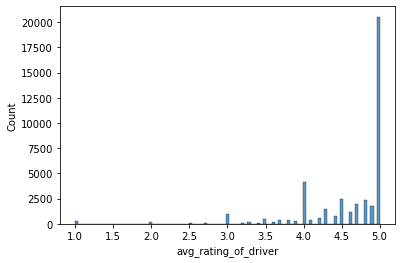

In [31]:
sns.histplot(x='avg_rating_of_driver', data=df_ult)
plt.show()

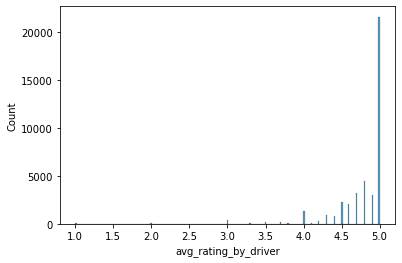

In [32]:
sns.histplot(x='avg_rating_by_driver', data=df_ult)
plt.show()

In [33]:
df_ult.groupby(df_ult.city).count()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
city,,,,,,,,,,,,
Astapor,13509,13509,13509,13509,13509,13509,13509,13509,13509,13509,13509,13509
King's Landing,8775,8775,8775,8775,8775,8775,8775,8775,8775,8775,8775,8775
Winterfell,19161,19161,19161,19161,19161,19161,19161,19161,19161,19161,19161,19161


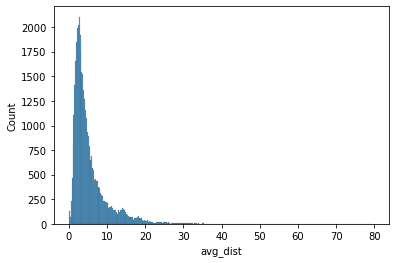

In [34]:
sns.histplot(x='avg_dist', data=df_ult)
plt.show()

In [35]:
y= df_ult['active']
dfu = df_ult.drop(['signup_date', 'last_trip_date', 'active'], axis=1)
dfu.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9


In [36]:
# All numerical columns have been scaled
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']
scaler.fit(dfu[cols_to_scale])
dfu[cols_to_scale] = scaler.transform(dfu[cols_to_scale])

In [37]:
dfu.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,0.342505,0.159520,0.131718,iPhone,0.354838,True,-0.432445,-0.347912,0.552529
1,Astapor,-0.642890,0.646456,-0.371440,Android,-0.485689,False,-0.323292,0.544197,0.552529
2,Astapor,0.096156,-0.489729,-0.371440,iPhone,-0.485689,False,1.112936,-0.911554,0.552529
3,King's Landing,1.574248,-0.002792,0.332981,iPhone,0.605905,True,0.538445,-0.602523,0.305372
4,Winterfell,2.805992,-0.327417,0.584560,Android,0.158351,False,0.607384,-0.452866,0.305372


In [38]:
# pd.get_dummies function used to onehotencode the categorical variables. For ultimate_black_user, we replace False with 0 and 
# True with 1 numerical values.
dfu = pd.get_dummies(dfu)
dfu['ultimate_black_user'].replace({False : 0, True : 1}, inplace= True)
dfu.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,0.342505,0.159520,0.131718,0.354838,1,-0.432445,-0.347912,0.552529,0,1,0,0,1
1,-0.642890,0.646456,-0.371440,-0.485689,0,-0.323292,0.544197,0.552529,1,0,0,1,0
2,0.096156,-0.489729,-0.371440,-0.485689,0,1.112936,-0.911554,0.552529,1,0,0,0,1
3,1.574248,-0.002792,0.332981,0.605905,1,0.538445,-0.602523,0.305372,0,1,0,0,1
4,2.805992,-0.327417,0.584560,0.158351,0,0.607384,-0.452866,0.305372,0,0,1,1,0


In [39]:
#Check accuracy of logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(dfu, y, test_size = 0.3, random_state = 42)
model = LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)
mod_predict= model.predict(X_test)
print(accuracy_score(mod_predict, y_test))

0.7727199613961718


In [40]:
#Using grid search and fine tune parameters in logistic regression
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logreg = LogisticRegression(max_iter=10000)
cv = GridSearchCV(logreg, param_grid = parameters, cv= 5)
cv.fit(X_train, y_train)
y_predict = cv.predict(X_test)
score= accuracy_score(y_test, y_predict)
print(cv.best_params_, score)

{'C': 10} 0.7727199613961718


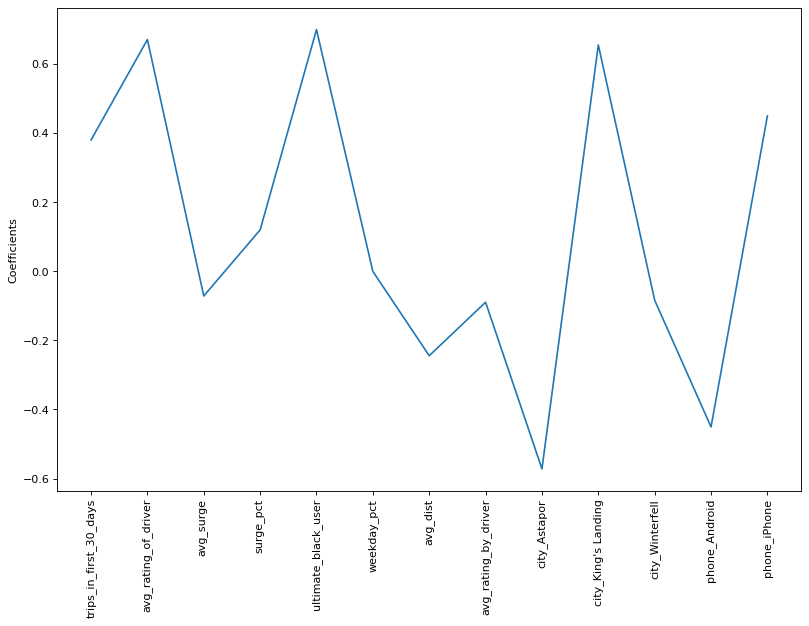

In [41]:
#check regression coefficients
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)
names= dfu.columns
logreg_coef = model.fit(X_train, y_train).coef_
_ = plt.plot(range(len(names)), np.reshape(logreg_coef, -1))
_ = plt.xticks(range(len(names)), names, rotation= 90)
_ = plt.ylabel('Coefficients')
plt.show()

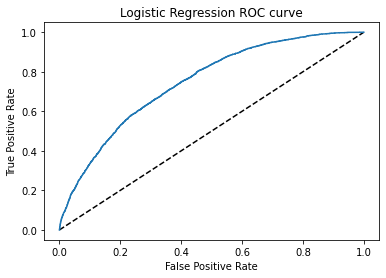

In [42]:
#ROC curve for Logistic Regression
y_pred_prob = cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()

In [43]:
#check AUC for logistic Regression
roc_auc_score(y_test, y_pred_prob)

0.7467041375167833

In [44]:
#Build a random forest classifier

clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1, max_depth= 50)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))
print("Confusion matrix")
print(cm)

Random Forest: Accuracy=0.796
Random Forest: f1-score=0.791
Confusion matrix
[[8348 1086]
 [1451 1549]]


In [45]:
#Hyperparameter tuning in Random forest classifier
#First use Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 300, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [46]:
# Use the random grid to search for best hyperparameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [47]:
#check accuracy with new parameters
clf_hyp = RandomForestClassifier(n_estimators= 300,
 min_samples_split= 2,
 min_samples_leaf= 4,
 max_features= 'sqrt',
 max_depth= 10,
 bootstrap= True, random_state= 42)

model_res1 = clf_hyp.fit(X_train, y_train)
y_pred = model_res1.predict(X_test)
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))
print("Confusion matrix")
print(cm)

Random Forest: Accuracy=0.814
Random Forest: f1-score=0.801
Confusion matrix
[[8757  677]
 [1634 1366]]


13


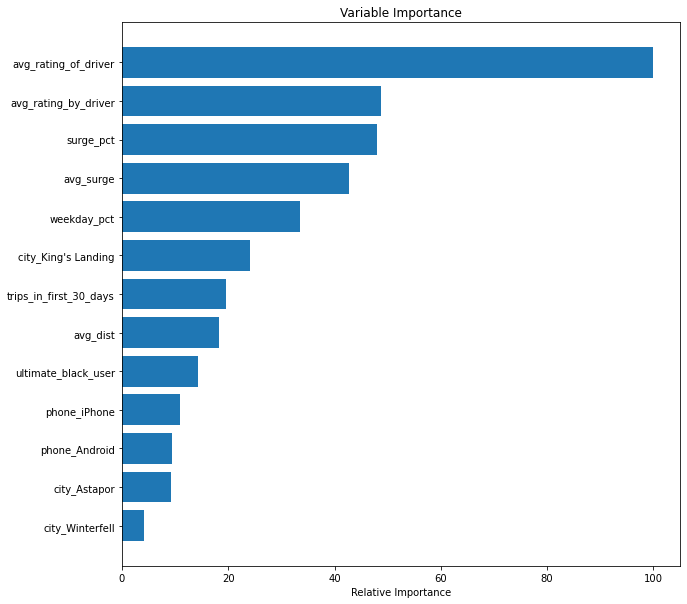

In [48]:
#Random forest feature importances

feature_importance = clf_hyp.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, dfu.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

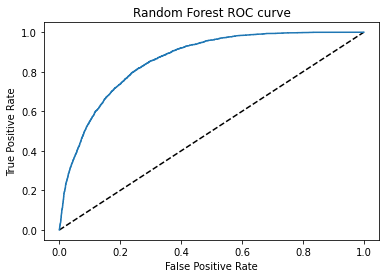

In [49]:
#ROC curve for Random Forest Regression
y_pred_prob = clf_hyp.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [50]:
#check AUC for Random Forest Regression
roc_auc_score(y_test, y_pred_prob)

0.8595000883329801

In [51]:
#Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=300, learning_rate= 0.01, random_state = 1, max_depth= 50)
model_gbc = gbc.fit(X_train, y_train)
y_pred_gbc = model_gbc.predict(X_test)
ac_gbc = accuracy_score(y_test, y_pred_gbc)

f1_gbc = f1_score(y_test, y_pred_gbc, average='weighted')
cm_gbc = confusion_matrix(y_test, y_pred_gbc)

print('Gradient Boost: Accuracy=%.3f' % (ac_gbc))

print('Gradient Boost: f1-score=%.3f' % (f1_gbc))
print("Confusion matrix")
print(cm_gbc)

Gradient Boost: Accuracy=0.756
Gradient Boost: f1-score=0.754
Confusion matrix
[[7979 1455]
 [1579 1421]]


In [52]:
#Gradient Boost Classifier hyperparameter tuning
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100],
}

In [53]:
#Gradient Boost Classifier hyperparameter tuning
gbc = GradientBoostingClassifier()
cv_gbc = GridSearchCV(gbc,parameters,cv=5)
cv_gbc.fit(X_train, y_train)
cv_gbc.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

In [54]:
gbc = GradientBoostingClassifier(n_estimators=250, learning_rate= 0.1, random_state = 1, max_depth= 3)
model_gbc = gbc.fit(X_train, y_train)
y_pred_gbc = model_gbc.predict(X_test)
ac_gbc = accuracy_score(y_test, y_pred_gbc)

f1_gbc = f1_score(y_test, y_pred_gbc, average='weighted')
cm_gbc = confusion_matrix(y_test, y_pred_gbc)

print('Gradient Boost: Accuracy=%.3f' % (ac_gbc))

print('Gradient Boost: f1-score=%.3f' % (f1_gbc))
print("Confusion matrix")
print(cm_gbc)

Gradient Boost: Accuracy=0.819
Gradient Boost: f1-score=0.809
Confusion matrix
[[8684  750]
 [1504 1496]]


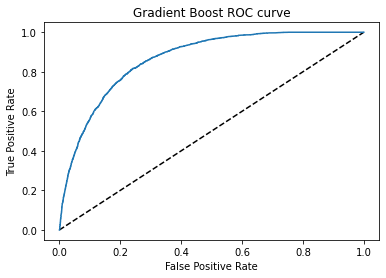

In [55]:
#ROC curve for Gradient Boost Regression
y_pred_prob = model_gbc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Gradient Boost ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boost ROC curve')
plt.show()

In [56]:
#check AUC for Gradient Boost Regression
roc_auc_score(y_test, y_pred_prob)

0.8659835700657198

Epoch 1/500
454/454 [==============================] - 1s 3ms/step - loss: 0.4160 - accuracy: 0.7994 - val_loss: 0.4060 - val_accuracy: 0.8047
Epoch 2/500
454/454 [==============================] - 1s 1ms/step - loss: 0.3945 - accuracy: 0.8100 - val_loss: 0.4022 - val_accuracy: 0.8078
Epoch 3/500
454/454 [==============================] - 1s 1ms/step - loss: 0.3877 - accuracy: 0.8108 - val_loss: 0.3950 - val_accuracy: 0.8097
Epoch 4/500
454/454 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8123 - val_loss: 0.3969 - val_accuracy: 0.8104
Epoch 5/500
454/454 [==============================] - 1s 1ms/step - loss: 0.3819 - accuracy: 0.8146 - val_loss: 0.3976 - val_accuracy: 0.8062
Epoch 6/500
454/454 [==============================] - 1s 1ms/step - loss: 0.3801 - accuracy: 0.8162 - val_loss: 0.3923 - val_accuracy: 0.8097
Epoch 7/500
454/454 [==============================] - 1s 1ms/step - loss: 0.3776 - accuracy: 0.8173 - val_loss: 0.3933 - val_accuracy: 0.8118

454/454 [==============================] - 0s 1ms/step - loss: 0.2572 - accuracy: 0.8873 - val_loss: 0.5106 - val_accuracy: 0.7925
Epoch 58/500
454/454 [==============================] - 0s 1ms/step - loss: 0.2544 - accuracy: 0.8894 - val_loss: 0.5128 - val_accuracy: 0.7887
Epoch 59/500
454/454 [==============================] - 0s 1ms/step - loss: 0.2480 - accuracy: 0.8906 - val_loss: 0.5278 - val_accuracy: 0.7858
Epoch 60/500
454/454 [==============================] - 0s 1ms/step - loss: 0.2460 - accuracy: 0.8937 - val_loss: 0.5414 - val_accuracy: 0.7904
Epoch 61/500
454/454 [==============================] - 1s 1ms/step - loss: 0.2440 - accuracy: 0.8949 - val_loss: 0.5457 - val_accuracy: 0.7893
Epoch 62/500
454/454 [==============================] - 0s 1ms/step - loss: 0.2411 - accuracy: 0.8961 - val_loss: 0.5458 - val_accuracy: 0.7891
Epoch 63/500
454/454 [==============================] - 0s 1ms/step - loss: 0.2399 - accuracy: 0.8971 - val_loss: 0.5541 - val_accuracy: 0.7891
Epoch

Epoch 114/500
454/454 [==============================] - 1s 1ms/step - loss: 0.1572 - accuracy: 0.9386 - val_loss: 0.9427 - val_accuracy: 0.7780
Maximum validation accuracy: 0.8142995238304138


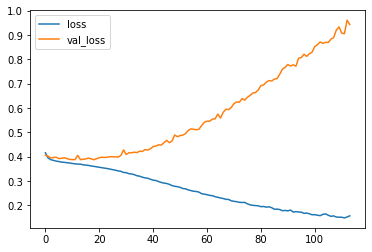

In [61]:
#Introduce neural network model
#Adding layers and dropout and batchnormalization
import numpy as np
import keras
import tensorflow as tf

from keras.layers import Dense

from keras.models import Sequential

from keras.optimizers import RMSprop, Adagrad, SGD

n_cols = dfu.shape[1]
#y_train = np.asarray(train_labels).reshape((-1,1))
#y_test = np.asarray(test_labels).reshape((-1,1))
model = Sequential()

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=100,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

keras.layers.Dropout(0.9),
model.add(Dense(300, activation='relu', input_shape = (n_cols,)))
keras.layers.Dropout(0.5),
keras.layers.BatchNormalization(),
model.add(Dense(300, activation='relu'))
keras.layers.Dropout(0.9),
keras.layers.BatchNormalization(),
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks= [early_stopping], batch_size=64, epochs=500)
#model.fit(X_Tf_df, y)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Maximum validation accuracy: {}".format(history_df['val_accuracy'].max()))

# The accuracies are as follows:
# Logistic Regression: 0.77
# Random Forest: 0.81
# Gradient Boost: 0.82
# Neural Network (non-optimized): 0.81